<a href="https://colab.research.google.com/github/yamihe19/Projects-SPAM_ham-Dataset-and-EnergyConsumption-Dataset/blob/main/Code_Projects_SPAM_Ham_Dataset_EnergyConsumption_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1: TEXT CLASSIFICATION USING LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER - SPAM/HAM Dataset

### The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

### Out of the 5572 sets of sms messages, approximately 20% of the messages have been trimmed and kept aside for Evaluating the model.
### This dataset is about building a prediction model as follows that will accurately classify which texts are spam?



In [ ]:
#Import lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#save as dataframe
df_spam = pd.read_csv("spamhamtrain.csv")

### Exploratory Data Analysis

In [ ]:
df_spam.head()

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


In [ ]:
df_spam.tail()

,Category,Message
4452,ham,K:)k:)good:)study well.
4453,ham,"Chinatown got porridge, claypot rice, yam cake..."
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
4455,ham,Tell me whos this pls:-)
4456,ham,You are gorgeous! keep those pix cumming :) th...


In [ ]:
for text in df_spam.Message:
  print(text)

K I'm leaving soon, be there a little after 9
No. Yes please. Been swimming?
It took Mr owl 3 licks
Its going good...no problem..but still need little experience to understand american customer voice...
K.. I yan jiu liao... Sat we can go 4 bugis vill one frm 10 to 3 den hop to parco 4 nb. Sun can go cine frm 1030 to 2, den hop to orc mrt 4 hip hop at 4...
I sent your maga that money yesterday oh.
Does cinema plus drink appeal tomo? * Is a fr thriller by director i like on at mac at 8.30.
Now, whats your house # again ? And do you have any beer there ?
Back 2 work 2morro half term over! Can U C me 2nite 4 some sexy passion B4 I have 2 go back? Chat NOW 09099726481 Luv DENA Calls £1/minMobsmoreLKPOBOX177HP51FL
Hello baby, did you get back to your mom's ? Are you setting up the computer now ? Filling your belly ? How goes it loverboy ? I miss you already ... *sighs*
When are you going to ride your bike?
You stayin out of trouble stranger!!saw Dave the other day hes sorted now!still with

In [ ]:
df_spam['binary_Category']= df_spam['Category'].map(lambda row: int(row == 'spam'))
df_spam['binary_Category']

0       0
1       0
2       0
3       0
4       0
       ..
4452    0
4453    0
4454    0
4455    0
4456    0
Name: binary_Category, Length: 4457, dtype: int64

In [ ]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         4457 non-null   object
 1   Message          4457 non-null   object
 2   binary_Category  4457 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 104.6+ KB


In [ ]:
df_spam.describe() # This variables is binary so is reasonable that the data is between 0 and 1

,binary_Category
count,4457.000000
mean,0.133274
std,0.339908
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df_spam.binary_Category.value_counts()

0    3863
1     594
Name: binary_Category, dtype: int64

In [ ]:
df_spam.binary_Category.value_counts(normalize=True)

0    0.866726
1    0.133274
Name: binary_Category, dtype: float64

#### Visualization of the data

In [ ]:
# Let's see which message is the most popular ham/spam message
df_spam.groupby('binary_Category').describe()

Category                    Message         \
                   count unique   top  freq   count unique   
binary_Category                                              
0                   3863      1   ham  3863    3863   3635   
1                    594      1  spam   594     594    522   

                                                                         
                                                               top freq  
binary_Category                                                          
0                                           Sorry, I'll call later   26  
1                Please call our customer service representativ...    4

In [ ]:
# Let's get the length of the messages
df_spam['length'] = df_spam['Message'].apply(len)
df_spam.head()

,Category,Message,binary_Category,length
0,ham,"K I'm leaving soon, be there a little after 9",0,45
1,ham,No. Yes please. Been swimming?,0,30
2,ham,It took Mr owl 3 licks,0,22
3,ham,Its going good...no problem..but still need li...,0,102
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,0,155


In [ ]:
df_spam

,Category,Message,binary_Category,length
0,ham,"K I'm leaving soon, be there a little after 9",0,45
1,ham,No. Yes please. Been swimming?,0,30
2,ham,It took Mr owl 3 licks,0,22
3,ham,Its going good...no problem..but still need li...,0,102
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,0,155
...,...,...,...,...
4452,ham,K:)k:)good:)study well.,0,23
4453,ham,"Chinatown got porridge, claypot rice, yam cake...",0,131
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ...",0,116
4455,ham,Tell me whos this pls:-),0,24


<Axes: ylabel='Frequency'>

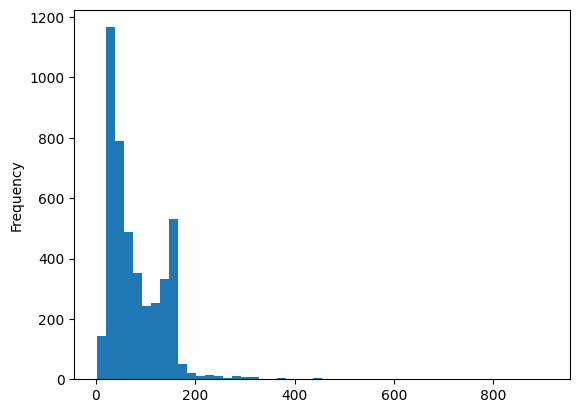

In [ ]:
df_spam['length'].plot(bins=50, kind='hist')

The lenght of the text are between o and 200 and there are others that are longer that might be spam or not.

In [ ]:
df_spam.length.describe()

count    4457.000000
mean       80.374467
std        60.329466
min         2.000000
25%        35.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The maximun values is 900 that might be and outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4d0556110>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4d0556e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4d0555e70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4d0557370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4d0557c10>],
 'means': []}

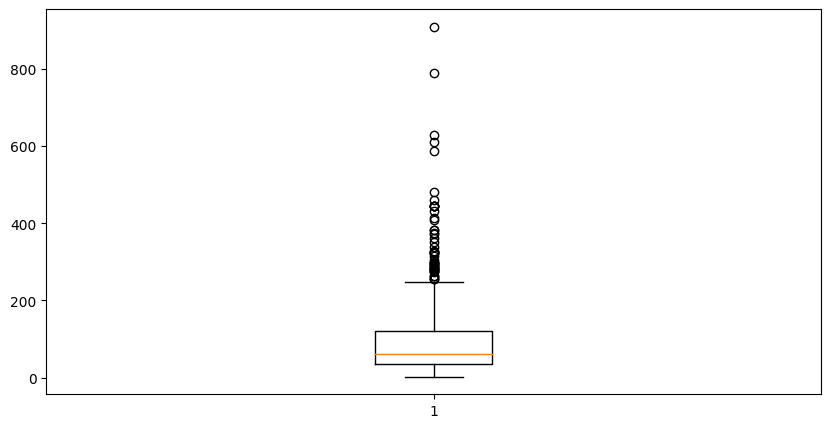

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 5))

# Creating boxplot
plt.boxplot(df_spam.length)


Yes, as I  predicted there are a lot of outliers in the dataset. For now I will continue with the analysis

In [ ]:
# Let's see the longest message 43952
df_spam[df_spam['length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
ham = df_spam[df_spam['binary_Category']==0]

In [ ]:
ham


,Category,Message,binary_Category,length
0,ham,"K I'm leaving soon, be there a little after 9",0,45
1,ham,No. Yes please. Been swimming?,0,30
2,ham,It took Mr owl 3 licks,0,22
3,ham,Its going good...no problem..but still need li...,0,102
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,0,155
...,...,...,...,...
4452,ham,K:)k:)good:)study well.,0,23
4453,ham,"Chinatown got porridge, claypot rice, yam cake...",0,131
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ...",0,116
4455,ham,Tell me whos this pls:-),0,24


In [ ]:
spam = df_spam[df_spam['binary_Category']==1]

In [ ]:
spam

,Category,Message,binary_Category,length
8,spam,Back 2 work 2morro half term over! Can U C me ...,1,159
17,spam,PRIVATE! Your 2003 Account Statement for shows...,1,134
21,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,1,155
26,spam,Guess what! Somebody you know secretly fancies...,1,156
37,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",1,142
...,...,...,...,...
4412,spam,SMS SERVICES For your inclusive text credits p...,1,152
4416,spam,WIN: We have a winner! Mr. T. Foley won an iPo...,1,132
4424,spam,"Do you ever notice that when you're driving, a...",1,135
4426,spam,"Twinks, bears, scallies, skins and jocks are c...",1,156


Now we are goin to see the range of lenght of spam and ham

<Axes: ylabel='Frequency'>

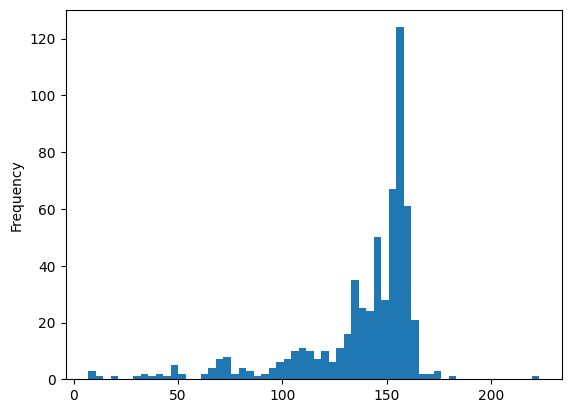

In [ ]:
spam['length'].plot(bins=60, kind='hist')

We can see that the data is skewed to the right

<Axes: ylabel='Frequency'>

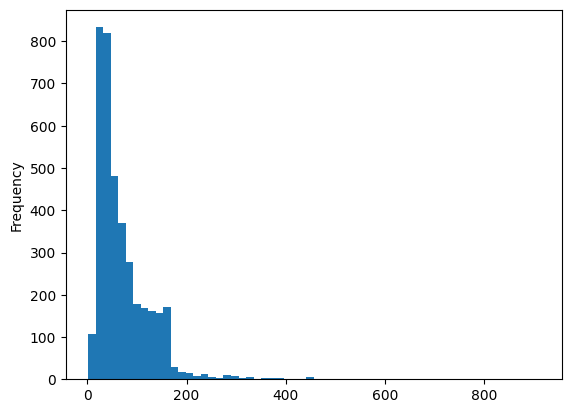

In [ ]:
ham['length'].plot(bins=60, kind='hist')

We can see that the data is skewed to the left, So are data is umbalance. We are going to see it in our baseline model results

In [ ]:
print( 'Spam percentage =', (len(spam) / len(df_spam) )*100,"%")

Spam percentage = 13.327350235584474 %


In [ ]:
print( 'Ham percentage =', (len(ham) / len(df_spam) )*100,"%")

Ham percentage = 86.67264976441552 %


In [ ]:
df_spam.binary_Category.value_counts()

0    3863
1     594
Name: binary_Category, dtype: int64

## Using Count Vectorizer to get a vector of number

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(df_spam['Message'])

In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'zouk' 'zyada' '〨ud']


In [ ]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
spamham_countvectorizer.shape

(4457, 7718)



## Splitting the data set

In [ ]:
X = spamham_countvectorizer
y = df_spam['binary_Category']

In [ ]:
X.shape

(4457, 7718)

In [ ]:
y.shape

(4457,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression with L2 Regularisation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
              'penalty':["l1","l2","slastinet", ]}

logreg= LogisticRegression(penalty="l2")

grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


result = grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9845165657572235
Best Hyperparameters: {'C': 100}


In [ ]:
logreg= LogisticRegression(penalty="l2", C=100)
logreg.fit(X_train,y_train)
predictions = logreg.predict(X_test)
y_pred_train= logreg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)


1.0

In [ ]:

accuracy_score(y_test, predictions)

0.9820627802690582

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1166,    4],
       [  20,  148]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1170
           1       0.97      0.88      0.93       168

    accuracy                           0.98      1338
   macro avg       0.98      0.94      0.96      1338
weighted avg       0.98      0.98      0.98      1338



Overall, the model shows high precision, recall, and F1-score for both ham and spam classes, with a high overall accuracy. This suggests that the model performs well in accurately classifying spam messages, while maintaining a good balance between precision and recall.

Precision: Precision measures the proportion of correctly predicted positive instances (spam) out of the total predicted positive instances. In this case, the precision for class 0 (ham) is 0.98, indicating that 98% of the predicted ham messages were actually ham. The precision for class 1 (spam) is 0.97, suggesting that 97% of the predicted spam messages were actually spam.
Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances (spam) out of the total actual positive instances. The recall for class 0 is 1.00, indicating that 100% of the actual ham messages were correctly identified as ham. The recall for class 1 is 0.88, suggesting that 88% of the actual spam messages were correctly identified as spam.
F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1-score for class 0 is 0.99, indicating a high balance between precision and recall for ham messages. The F1-score for class 1 is 0.93, suggesting a slightly lower balance between precision and recall for spam messages.
Support: Support represents the number of instances of each class in the test set. In this case, there are 1170 instances of class 0 (ham) and 168 instances of class 1 (spam).
Accuracy: Accuracy measures the overall correctness of the model's predictions. The accuracy of the model is 0.98, indicating that it correctly classified 98% of the instances in the test set.
Macro Avg: The macro average calculates the average performance across all classes, giving equal weight to each class. The macro average precision, recall, and F1-score are 0.98, 0.94, and 0.96, respectively.
Weighted Avg: The weighted average calculates the average performance across all classes, weighted by the number of instances in each class. The weighted average precision, recall, and F1-score are 0.98, 0.98, and 0.98, respectively.


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
base_estimator = RandomForestClassifier(random_state=0)

In [ ]:
forest_param= [{'max_depth': list(range(10,15)), 'max_features': list(range(0,14))}]
grid_search = GridSearchCV(estimator = base_estimator,
                           param_grid = forest_param,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


result = grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8667265580569019
Best Hyperparameters: {'max_depth': 10, 'max_features': 1}


In [ ]:
rfc= RandomForestClassifier(max_depth= 10, max_features= 1)
rfc.fit(X_train,y_train)
predictions1 = rfc.predict(X_test)
y_pred_train1= rfc.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train1)

0.8634177621032382

In [ ]:

accuracy_score(y_test, predictions1)

0.874439461883408

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,predictions1)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,predictions1))

Based on the accuracy scores obtained, it can be concluded that logistic regression outperformed the Random Forest classifier. This outcome suggests that the logistic regression model was better suited for accurately classifying spam messages in this particular dataset.

One possible reason for logistic regression's higher accuracy could be attributed to the fact that it required less effort in parameter tuning compared to the Random Forest classifier. While logistic regression typically has fewer hyperparameters to adjust, Random Forest often requires more extensive parameter optimization to achieve optimal performance. It is possible that with further refinement of the Random Forest model's hyperparameters, its accuracy could be improved to match or potentially surpass that of logistic regression.

In summary, the logistic regression model exhibited superior accuracy in classifying spam messages compared to the Random Forest classifier. However, it is important to consider that this conclusion is based on the specific dataset and the choices made in parameter tuning. Further experimentation and fine-tuning of the Random Forest model could potentially enhance its performance and lead to comparable or even superior accuracy.

# PROJECT 2: SGD REGRESSOR USING K-CROSS FOLD AND REGULARIZATION - Steel Industry Energy Consumption Dataset

### Data Set Information:

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.



Attribute Information:

Data Variables Type Measurement

Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

tCO2(CO2) Continuous ppm

Lagging Current power factor Continuous %

Leading Current Power factor Continuous %

Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday and Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load





---
###  Linear regression on the dataset above to build a model with Energy Consumption as the Target Variable.

### Deliverables:


In [ ]:
df= pd.read_csv('Steel_industry_data.csv')

# Data Explaration Analysis

In [ ]:
df.head()


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
df.shape


(35040, 11)

There 11 variables in the data set

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

There 3 categirical  variables, 7 continuos variables and 1 datetime variable

In [ ]:
df.WeekStatus.value_counts()


Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [ ]:
df.Day_of_week.value_counts()

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

In [ ]:
df.Load_Type.value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [ ]:
df.drop('date', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

No missing values in the data set

In [ ]:
df.describe() # To describe continuos variables

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


We can observe that almost all the variables have a large maximum values very far from the mean and the meadian except NSM. So might be outliers and the distribition could be skewed. We are going to continye to  visualize with plots.

### Data Visualization

<ipython-input-180-46a89ceb4b02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Usage_kWh']) # Visualize the target variable


<Axes: xlabel='Usage_kWh', ylabel='Density'>

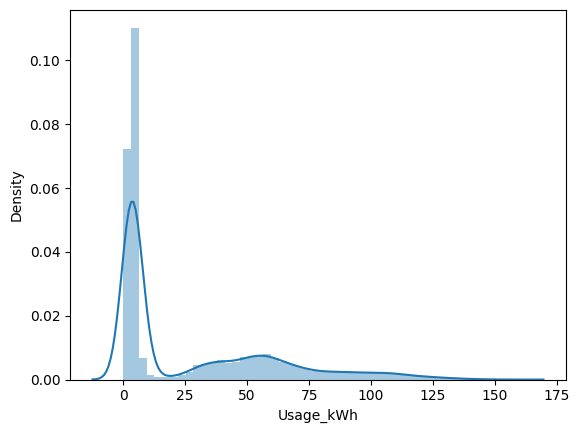

In [ ]:
sns.distplot(df['Usage_kWh']) # Visualize the target variable

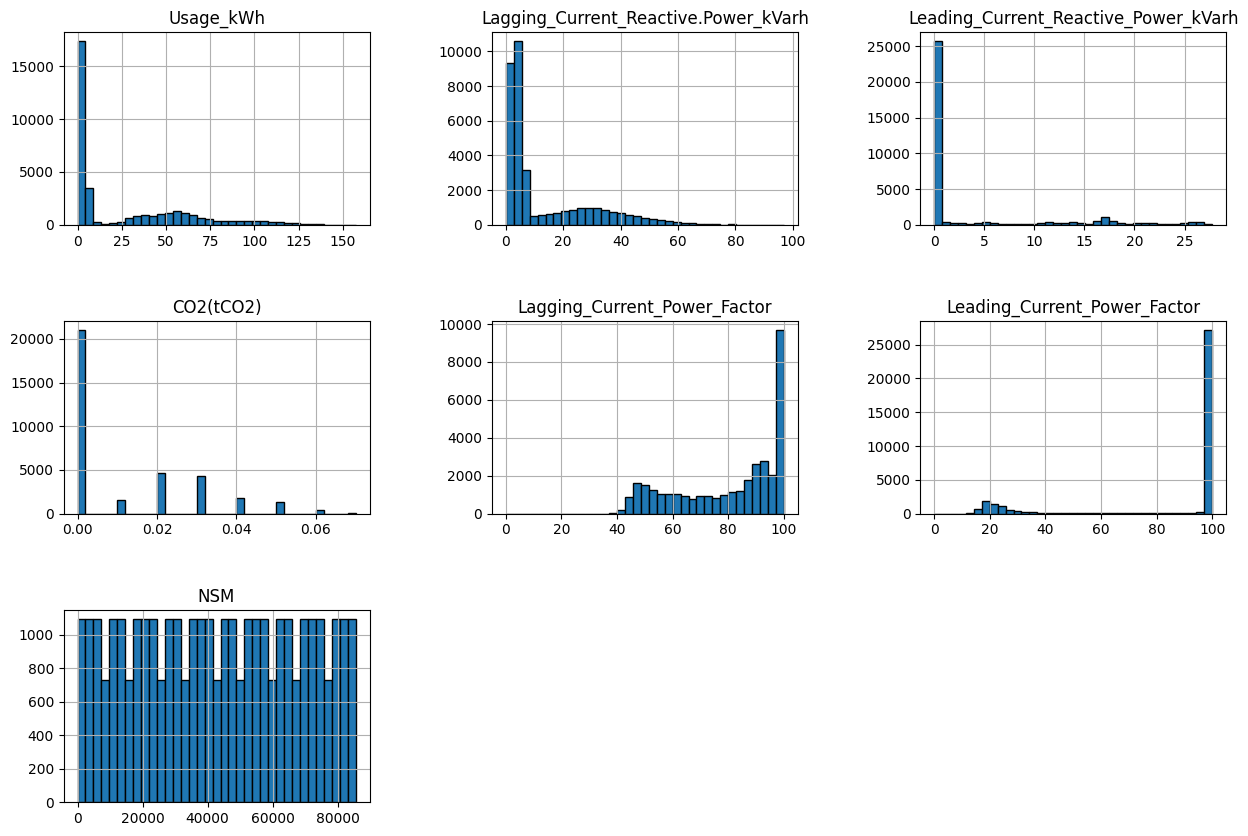

In [ ]:
df.hist(figsize=(15, 10), bins=35, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

All the variables as we mentioned before are akewed except NSM because refers to the  Number of Seconds from midnight Continuos.

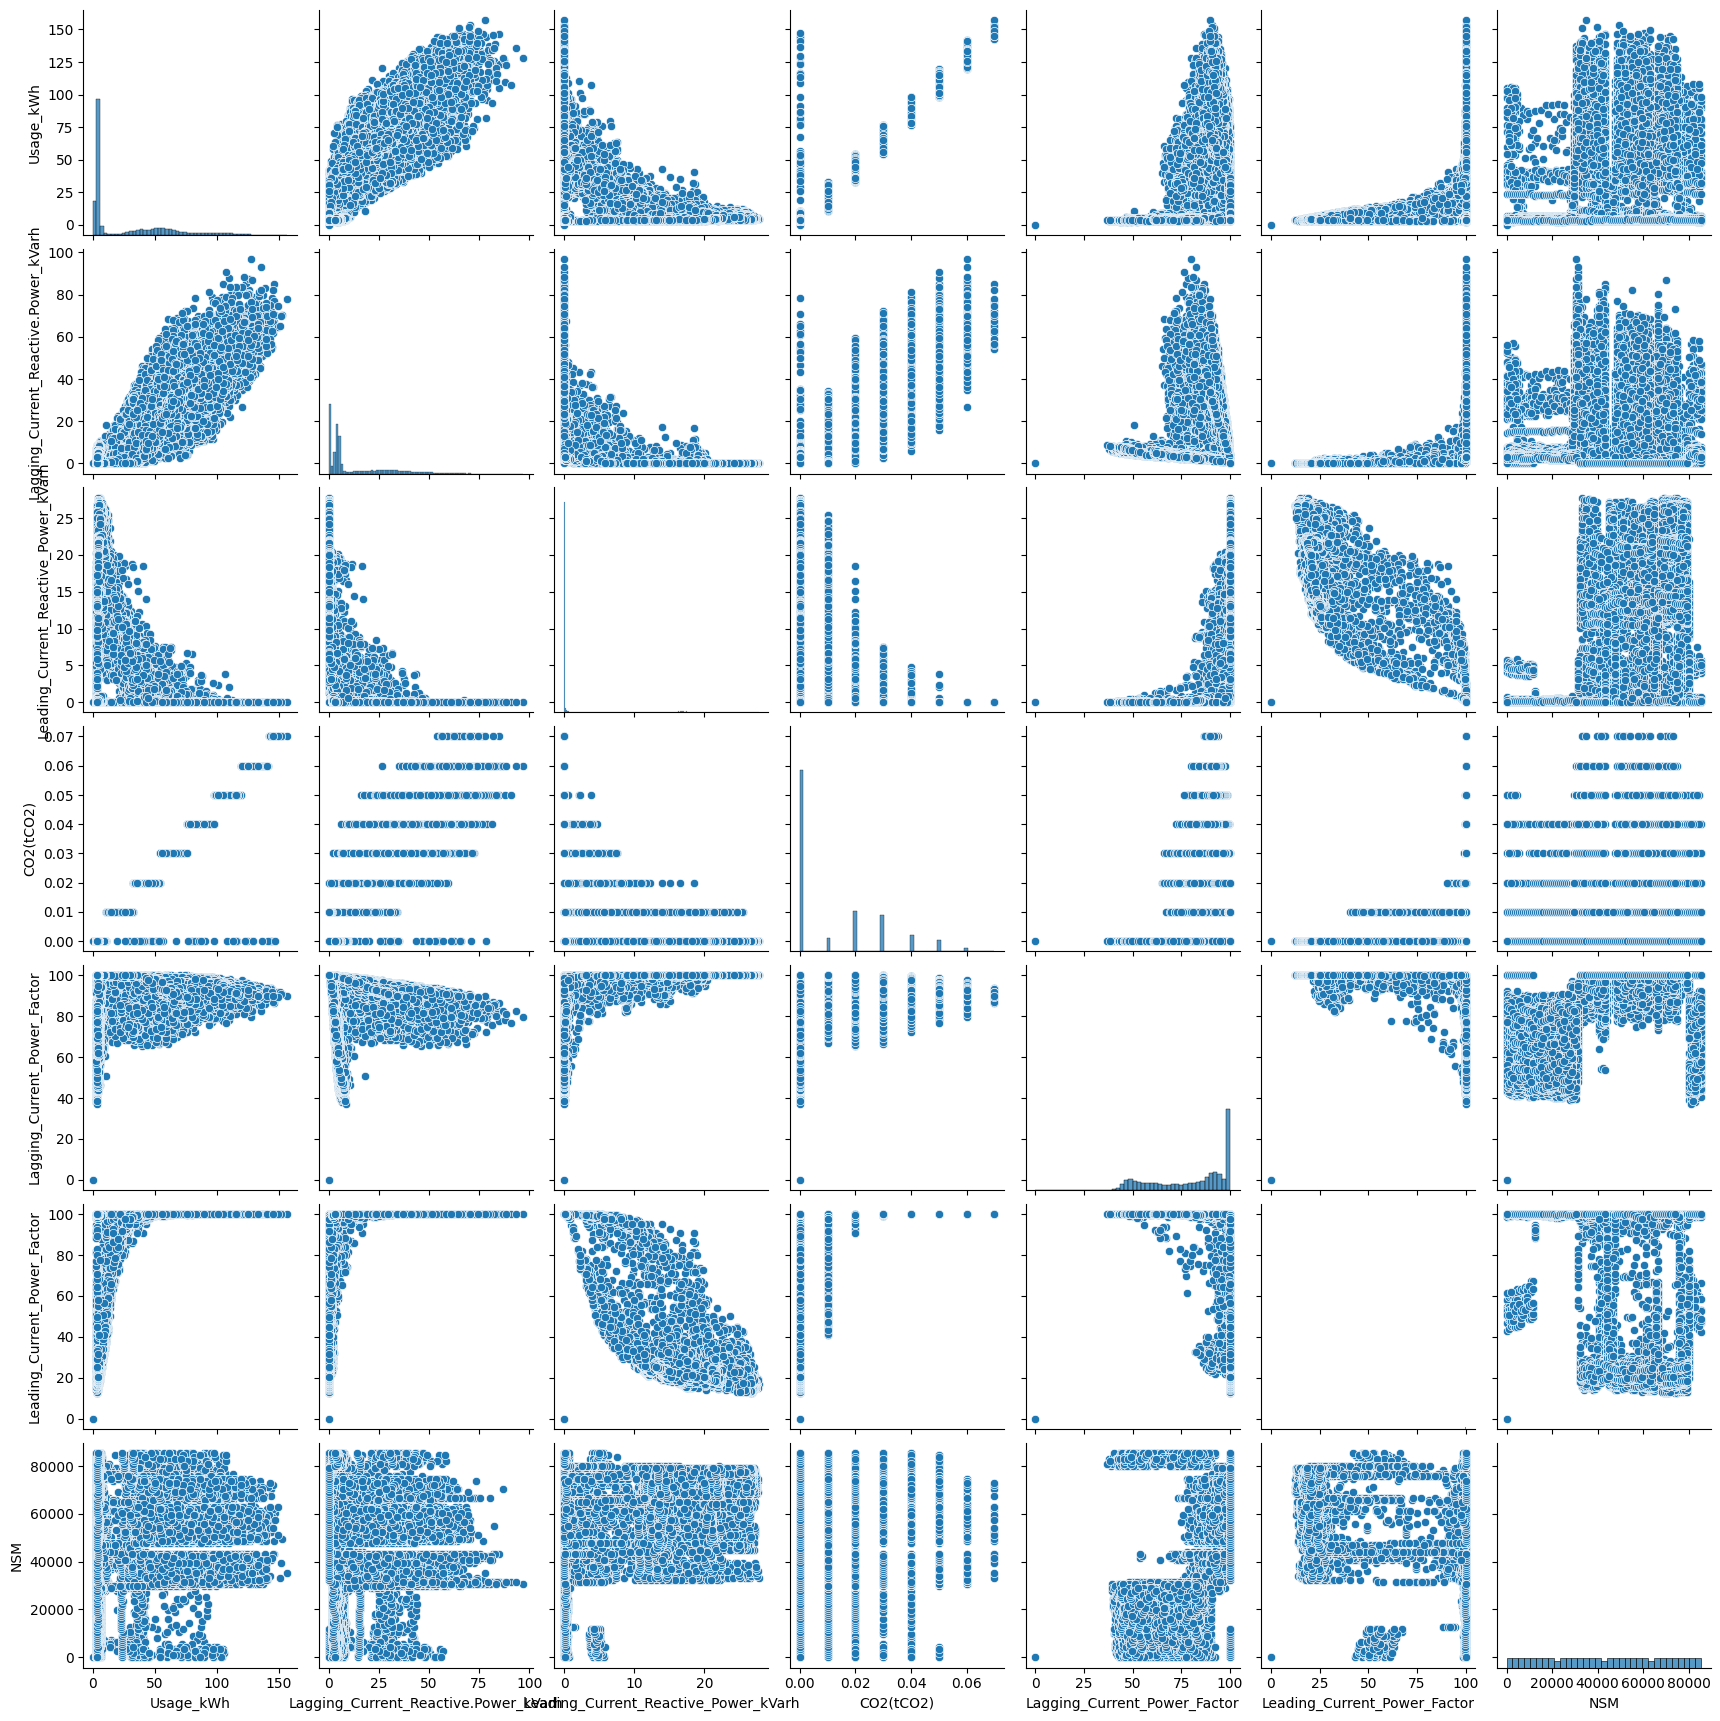

In [ ]:
sns.pairplot(df)

In [ ]:

from scipy import stats
variables= df.iloc[:,1:7].columns
print(variables)


Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')


In [ ]:
#Variables that can have cross correlation
for i, var1 in enumerate(variables):
  for j, var2 in enumerate(variables[i + 1:], start = i + 1):
    x = variables[i]
    y = variables[j]
    res = stats.pearsonr(df[x], df[y])
    coef, p_val= res
    if (p_val <0.05 and abs(coef)> 0.5):

      print(f"Correlation between {x} and {y}:")
      print(res)
      print('\n')

Correlation between Lagging_Current_Reactive.Power_kVarh and CO2(tCO2):
PearsonRResult(statistic=0.8869477080514374, pvalue=0.0)


Correlation between Leading_Current_Reactive_Power_kVarh and Lagging_Current_Power_Factor:
PearsonRResult(statistic=0.5267704711405987, pvalue=0.0)


Correlation between Leading_Current_Reactive_Power_kVarh and Leading_Current_Power_Factor:
PearsonRResult(statistic=-0.9440389991536426, pvalue=0.0)


Correlation between Lagging_Current_Power_Factor and Leading_Current_Power_Factor:
PearsonRResult(statistic=-0.5199668536819579, pvalue=0.0)


Correlation between Lagging_Current_Power_Factor and NSM:
PearsonRResult(statistic=0.565269507072399, pvalue=0.0)




From this results we can that the variables that has cross linear correlation are :

- Lagging_Current_Reactive.Power_kVarh and CO2(tCO2)= (0.88)
- Leading_Current_Reactive_Power_kVarh and Leading_Current_Power_Factor (0.94)

From this results we can that the variables that has cross non-linear correlation are :
- Leading_Current_Reactive_Power_kVarh and Lagging_Current_Power_Factor (0.52)
- Lagging_Current_Power_Factor and Leading_Current_Power_Factor (0.51)
- Lagging_Current_Power_Factor and NSM (0.56)

The variables that has a strong  cross correlation are:
- Lagging_Current_Reactive.Power_kVarh and CO2(tCO2)= (0.88)
- Leading_Current_Reactive_Power_kVarh and Leading_Current_Power_Factor (0.94)

The other has moderate cross correlation so for now we are going tu concentrate with the one that has strong cross correlation

<ipython-input-146-8ecf721bec05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='cool',annot=True)


<Axes: >

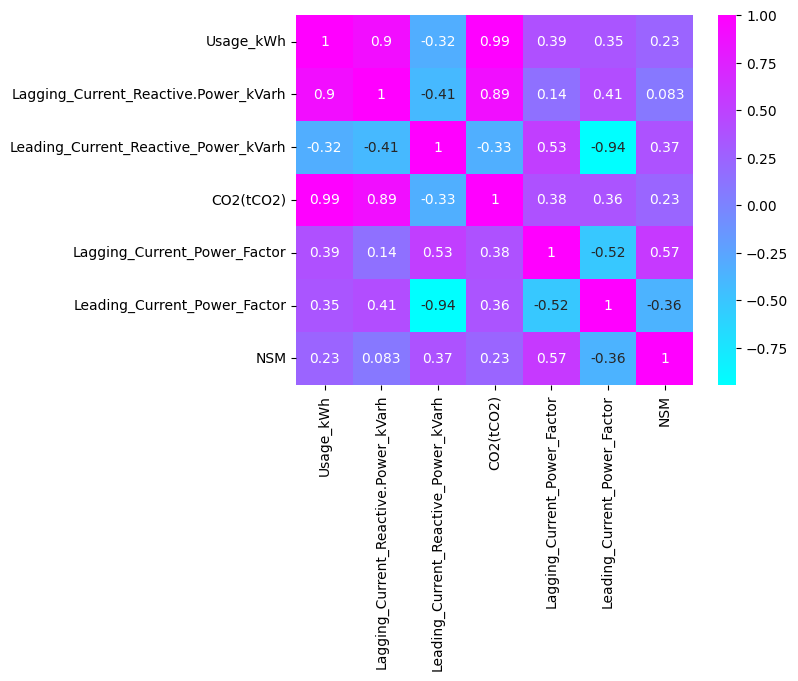

In [ ]:
sns.heatmap(df.corr(),cmap='cool',annot=True)

<ipython-input-198-740ef0e52886>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,1,count)


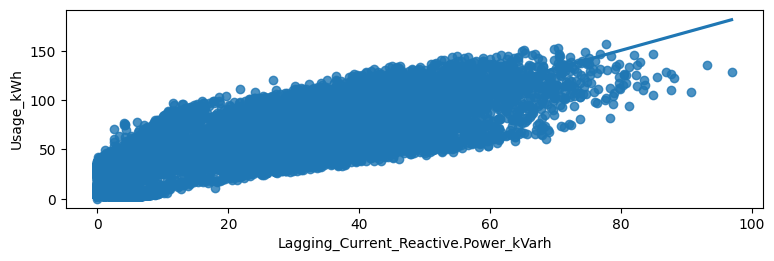

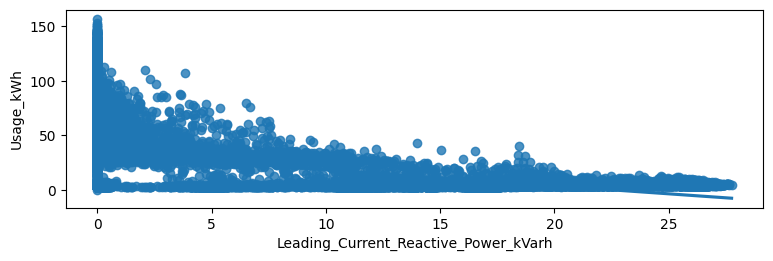

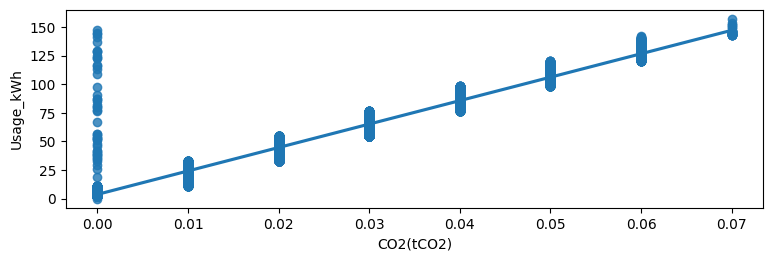

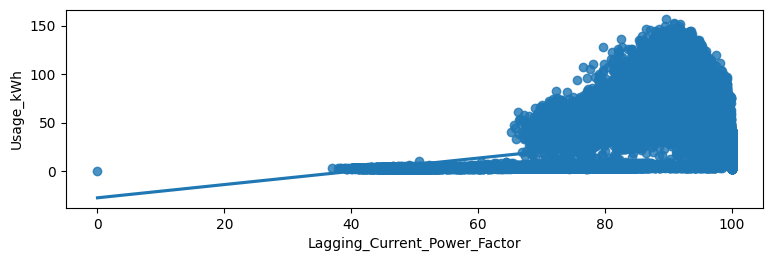

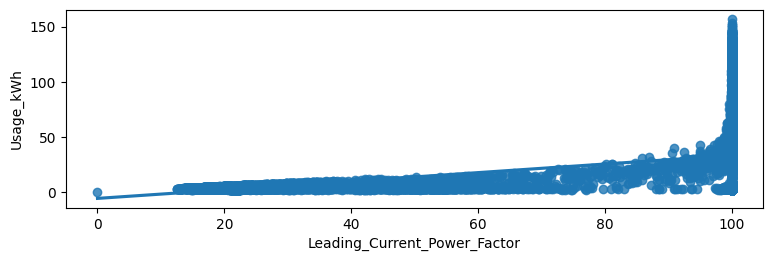

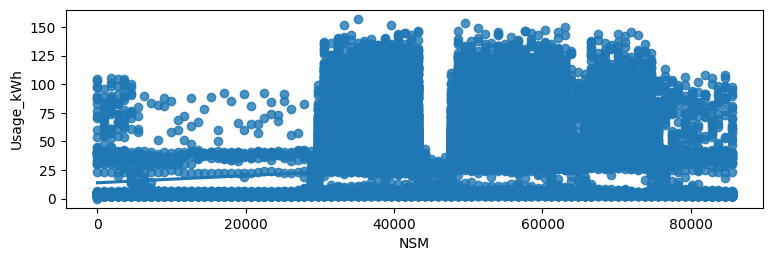

In [ ]:
# See the correlation with the target variable
count=1
for col in variables:
    plt.subplots(figsize=(9, 18))
    plt.subplot(6,1,count)
    sns.regplot(x= col, y = 'Usage_kWh', data=df)
    count+=1
    plt.show()

In [ ]:
# Correlation with the target variable

from scipy import stats
def get_spearmanr_and_pvalue(df):
    column_list2 = []
    for column2 in variables:
        coef, p_val = stats.spearmanr(df[column2], df['Usage_kWh'])
        if (p_val <0.05 and abs(coef)> 0.5):
            column_list2.append(column2)
            print(column2)
            print("Correlatrion coeficient value is ",coef)
            print("P value is",p_val)
    return column_list2
get_spearmanr_and_pvalue(df)

Lagging_Current_Reactive.Power_kVarh
Correlatrion coeficient value is  0.6449373744353163
P value is 0.0
CO2(tCO2)
Correlatrion coeficient value is  0.881513949180869
P value is 0.0


['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)']

Hight correlation between the atributes that might create multicolinearity

### Create new correlated attributes

In [ ]:
df['Lg_CO2']= df['Lagging_Current_Reactive.Power_kVarh']*df['CO2(tCO2)']
df['Lgcrp_lcpf']= df['Leading_Current_Reactive_Power_kVarh']*df['Leading_Current_Power_Factor']

### Dummy variables

In [ ]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Lg_CO2', 'Lgcrp_lcpf'],
      dtype='object')

In [ ]:
# Categorical Encoding
# one hot encoding df[['WeekStatus', 'Day_of_week', 'Load_Type']]

one_hot= ['WeekStatus', 'Day_of_week', 'Load_Type']
#drop origin_1 to prevent multicolinearity.
df_dum= pd.get_dummies(df, columns=one_hot, drop_first = True)
df_dum.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Lg_CO2,Lgcrp_lcpf,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0.0,0.0,0,1,0,0,0,0,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0.0,0.0,0,1,0,0,0,0,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0.0,0.0,0,1,0,0,0,0,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0.0,0.0,0,1,0,0,0,0,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0.0,0.0,0,1,0,0,0,0,0,0,0


## 2. Use the SGD Regressor class with scaling

In [ ]:

X= df_dum.drop('Usage_kWh', axis=1)
y= df_dum['Usage_kWh']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import  SGDRegressor
sdreg= SGDRegressor()
sdreg.fit(X_train, y_train)
y_pred_train = sdreg.predict(X_train)
y_pred = sdreg.predict(X_test)


In [ ]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error train:",mean_absolute_error(y_train, y_pred_train))
print("\tMean absolute error test:", mean_absolute_error(y_test, y_pred))
print("\tR2 score train:", r2_score(y_train, y_pred_train))
print("\tR2 score test:", r2_score(y_test, y_pred))
print()

	Explained variance train: 0.9796113124635804
	Explained variance: 0.9846481829490568
	Mean absolute error train: 2.700929938579919
	Mean absolute error test: 2.636676729843842
	R2 score train: 0.9796107104923242
	R2 score test: 0.9846302334561328



## Use repeated k cross fold with 2 repeats and k = 5



In [ ]:
#Perform K-fold Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
k_values = range(2, 6)
scores_mean = []

for k in k_values:
    # Calculate the cross-validated accuracy score
    scores = cross_val_score(sdreg, X_train, y_train, cv=k)
    scores_mean.append(scores.mean())

# Print the change in classification accuracy for each K value
for k, score in zip(k_values, scores_mean):
    print(f'K = {k},  Score  : {score}')


K = 2,  Score  : 0.9794091479052718
K = 3,  Score  : 0.9793480510928149
K = 4,  Score  : 0.979593268390683
K = 5,  Score  : 0.9796279398694224


The SDRegressor model demonstrates consistent and high performance across different values of K in K-fold cross-validation.
The accuracy scores for K = 2, K = 3, K = 4, and K = 5 are all around 0.9794 to 0.9796, indicating accurate classification.
This suggests that the SDRegressor model is effective in predicting the target variable and generalizes well to different subsets of the data.
In summary, the SDRegressor model shows strong performance in accurately predicting the target variable, as evidenced by the consistently high accuracy scores obtained through K-fold cross-validation.
 Even though we are going to continue with thje Gridsearch

## Optimize and find the optimal hyperparameters of tolerance and alpha


In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
param = {
    'tol':[1e-3, 1e-4, 1e-5],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10,100],
}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = SGDRegressor( )
# define search# To find out the best parameteres
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_sc, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -2.644634782030442
Best Hyperparameters: {'alpha': 0.0001, 'tol': 0.0001}


In [ ]:
model= SGDRegressor(alpha= 0.0001, tol= 0.0001)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error train:",mean_absolute_error(y_train, y_pred_train))
print("\tMean absolute error test:", mean_absolute_error(y_test, y_pred))
print("\tR2 score train:", r2_score(y_train, y_pred_train))
print("\tR2 score test:", r2_score(y_test, y_pred))
print()

	Explained variance train: 0.9797142971430169
	Explained variance: 0.9847070613347354
	Mean absolute error train: 2.669067833735417
	Mean absolute error test: 2.607588499280407
	R2 score train: 0.9797142422852885
	R2 score test: 0.9846942744798598



## Use Elastic net regularization and find its optimal parameters for the model

In [ ]:
param = {
    'tol':[1e-3, 1e-4, 1e-5],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10,100],
    'fit_intercept':[True, False],
    'eta0':[0.1,0.01]
}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model1 = SGDRegressor(penalty="l2")
# define search# To find out the best parameteres
search = GridSearchCV(model1, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_sc, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -2.642163912091976
Best Hyperparameters: {'alpha': 0.0001, 'eta0': 0.01, 'fit_intercept': True, 'tol': 0.0001}


In [ ]:
model1= SGDRegressor(alpha= 0.0001, tol= 0.0001, fit_intercept= True,eta0=0.01, penalty="l2")
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred = model1.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error train:",mean_absolute_error(y_train, y_pred_train))
print("\tMean absolute error test:", mean_absolute_error(y_test, y_pred))
print("\tR2 score train:", r2_score(y_train, y_pred_train))
print("\tR2 score test:", r2_score(y_test, y_pred))
print()

	Explained variance train: 0.9797204203586076
	Explained variance: 0.984766043339666
	Mean absolute error train: 2.661335095319641
	Mean absolute error test: 2.5990663224168298
	R2 score train: 0.9797198973236211
	R2 score test: 0.9847502632287725



Despite not finding further improvement through regularization, the model still performs exceptionally well. This is evident from the evaluation metrics:

Explained Variance: The model achieves an explained variance score of approximately 0.98 on both the training and test datasets. This indicates that the model can explain a significant portion of the variance in the target variable.
Mean Absolute Error: The mean absolute error is relatively low for both the training and test datasets, with values around 2.66 and 2.60, respectively. This implies that, on average, the model's predictions are close to the actual values.
R2 Score: The R2 score, also known as the coefficient of determination, measures the proportion of the variance in the target variable that can be explained by the model. The model achieves a high R2 score of approximately 0.98 on both the training and test datasets, indicating its strong predictive ability.
These evaluation metrics collectively demonstrate that the model performs very well in accurately predicting the target variable. Despite not observing significant improvements with regularization, the model achieves high accuracy and precision, making it a reliable choice for making predictions in this context.